# <center> Feature Engineering and Modelling
---

### 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

sns.set(color_codes=True)

---
### 2. Load data

In [3]:
df = pd.read_csv('data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

### 3. Modelling

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


#### Splitting the data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


#### Model training

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Evaluation

In [8]:
# Making predictions on the test set
y_pred = rf_model.predict(X_test)

In [10]:
# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [11]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9038882803943045
Confusion Matrix:
[[3282    4]
 [ 347   19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.83      0.05      0.10       366

    accuracy                           0.90      3652
   macro avg       0.87      0.53      0.52      3652
weighted avg       0.90      0.90      0.86      3652



## Performing Hyperparameter tuning

In [15]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

In [21]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, scoring='accuracy', cv=5, n_iter=10)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [3, 5, 7],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy')

In [22]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [23]:
y_pred = best_model.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [25]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9000547645125958
Confusion Matrix:
[[3286    0]
 [ 365    1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       1.00      0.00      0.01       366

    accuracy                           0.90      3652
   macro avg       0.95      0.50      0.48      3652
weighted avg       0.91      0.90      0.85      3652



### Conclusion:

**Before Hyperparameter Tuning:**
- Accuracy: 90.39%
- F1-score (Class 1): 10%
- The model achieved good accuracy but struggled with precision, recall, and F1-score for Class 1.

**After Hyperparameter Tuning:**
- Accuracy: 90.01%
- F1-score (Class 1): 1%
- The tuned model shows marginal changes, with a slight decrease in accuracy and minimal improvement in Class 1 metrics.

### Analysis:

1. **Choice of Evaluation Metrics:**
   - Selected metrics: Accuracy, Confusion Matrix, Precision, Recall, F1-score.
   - **Reasoning:** The problem involves imbalanced classes (Class 1 has fewer samples), necessitating a focus on precision, recall, and F1-score to assess the model's ability to correctly classify positive instances.
2. **Hyperparameter Tuning Impact:**
   - The tuning process didn't lead to substantial improvements in model performance.
   - The model still struggles to correctly classify instances of Class 1, as evident from low precision, recall, and F1-score.
3. **Satisfactory Model Performance:**
   - The model's performance, both before and after tuning, is not satisfactory, especially for Class 1.
   - Despite achieving high accuracy, the model's inability to effectively predict positive instances indicates the need for further exploration, possibly with more advanced dataset and feature engineering.
4. **Justification for Model Performance:**
   - The imbalanced nature of the dataset, coupled with the complexity of the problem, challenges the model's ability to generalize well, even with hyperparameter tuning.

### 4. Model Understanding: Feature Importance

In [28]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

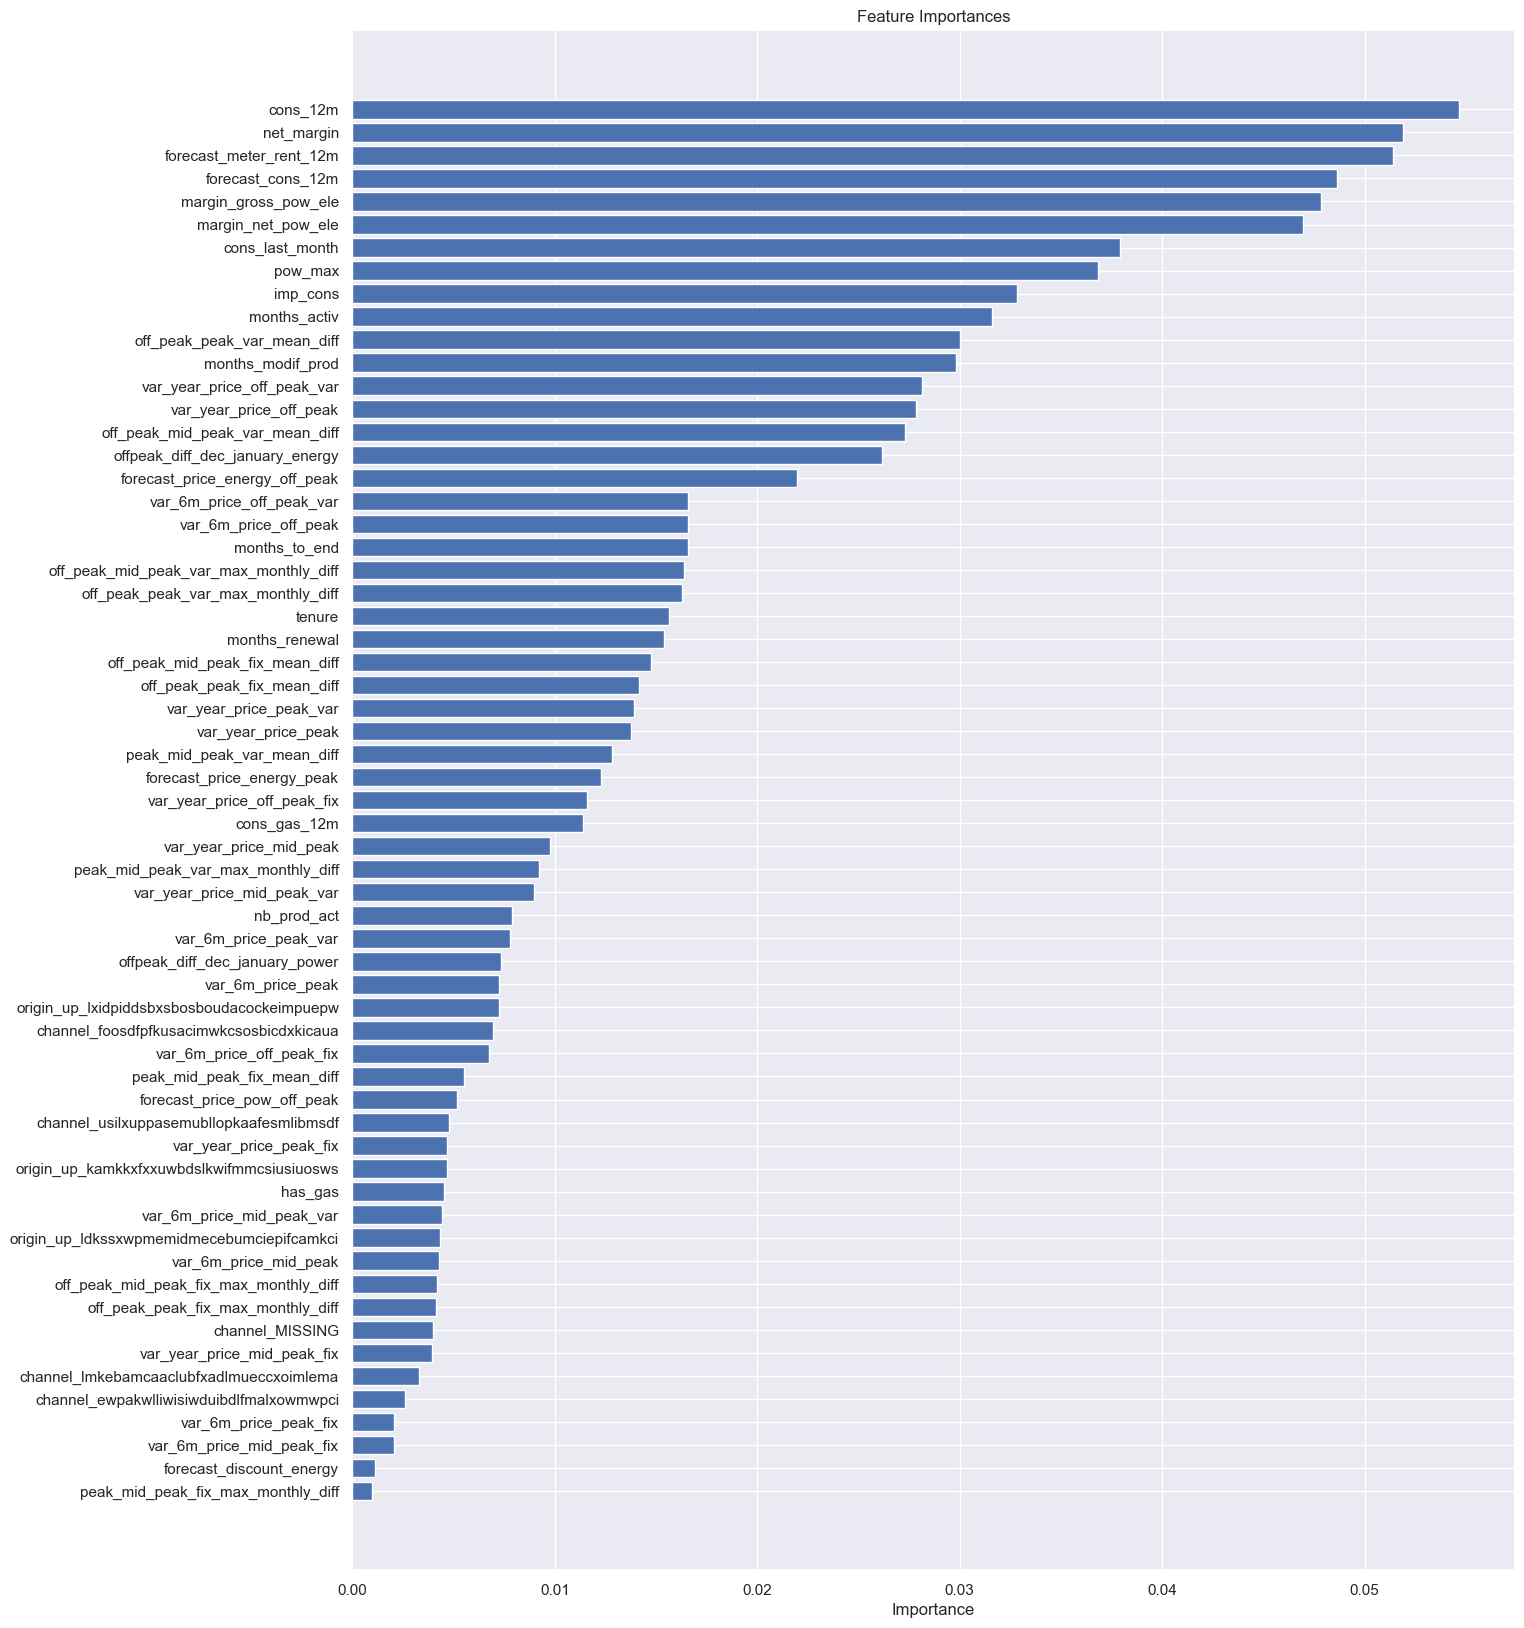

In [30]:
plt.figure(figsize=(15, 20))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

**Insights from Feature Importance Analysis:**

1. **Net Margin Dominance:** The analysis highlights net margin and 12-month consumption as paramount contributors to churn, indicating the financial health's significant impact.

2. **Power Subscription Margin:** Margin on power subscriptions emerges as a crucial influencer, underscoring the importance of subscription-related financial metrics.

3. **Temporal Dynamics:** Time-related factors, including customer tenure and update recency, exhibit notable influence, emphasizing the temporal dimension in understanding churn patterns.

4. **Recommendation Validation:** Features aligned with a colleague's suggestion showcase substantial influence, affirming the value of collaborative insights.

5. **Price Sensitivity Insights:** Contrary to the initial hypothesis, price sensitivity features show scattered impact, with no decisive role in driving customer churn.

6. **Experimentation Imperative:** While the analysis dismisses price sensitivity as a primary driver, the weak contribution implies the need for further experimentation to refine conclusions and enhance predictive accuracy.